# Homework Two

## Problem One

- Not so fast! Use a perturbation analysis to show that the leapfrog scheme (time-centered difference): ρn+1j −ρn−1j = −vo∆t∆x(ρnj+1 −ρnj−1),. is conditionally stable, i.e. it is stable as long as ∆t ≤ ∆x/v0. Assume that v0 is a constant velocity.

In [179]:
#Imports
import decimal 
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
from time import time
import math
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [180]:
#The Equation 
def Eq_a(v_0, delta_t, delta_x,  k):
    
    return v_0*(np.divide(delta_t, delta_x))*2*np.sin(k*delta_t)

In [181]:
#Values and Arrays
V_0 = 1 #Assuming a constant velocity 
K = 5
Delta_T = np.arange(0.1, 100, 0.001)
Delta_X = Delta_T[::-1]
#print(Delta_T)
#print(Delta_X)
#print(np.divide(Delta_T,Delta_X))
#print(np.sin(Delta_T))
aa = np.where(Delta_T > (Delta_X/V_0))[0][0]
print(aa)
print(Delta_T[aa])

49950
50.05000000000005


In [182]:
a = 1
b = V_0*(np.divide(Delta_T, Delta_X))*2j*np.sin(K*Delta_T)
c = -1

E_Array = []
EM_Array = []

for i in b:
    C = [a, i, c]

    E_Array.append(np.roots(C)[0])
    EM_Array.append(abs(np.roots(C)[0]))
    
#print(E_Array)    
#print(E_Array[0][0])
print(E_Array[0])
print(abs(E_Array[0]))
print(EM_Array[0])

(0.9999998850732715-0.0004794303329075319j)
1.0000000000000002
1.0000000000000002


In [183]:
Y_Array = np.linspace(min(EM_Array), max(EM_Array), len(EM_Array))
Y_Line = np.full(shape = len(EM_Array), fill_value = Delta_T[aa])


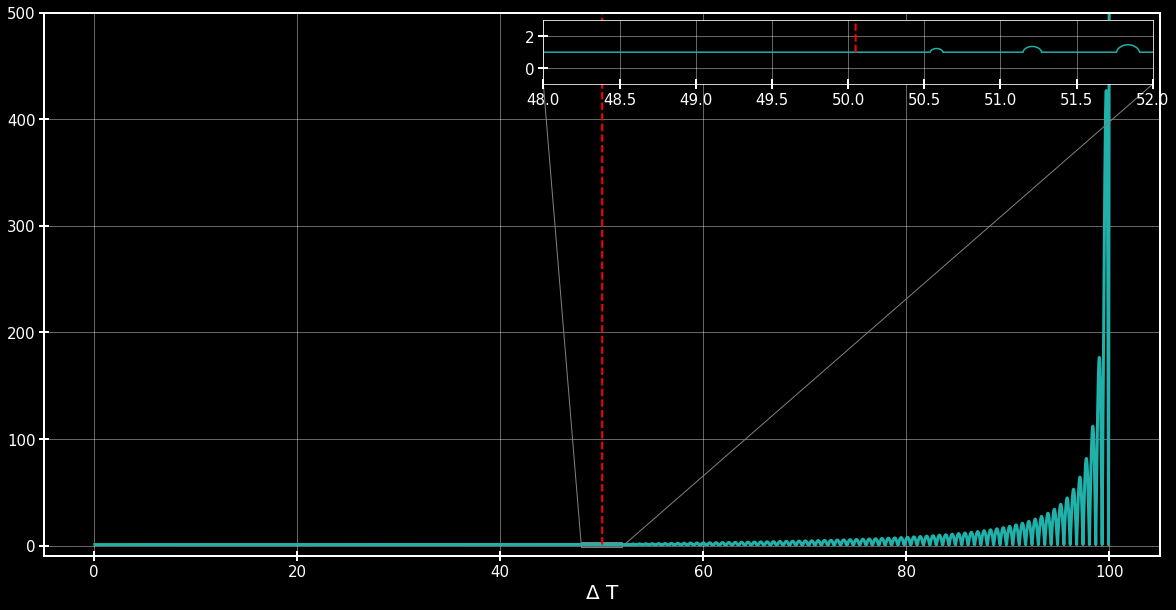

In [184]:
# Plotting 
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig = plt.figure(figsize = (20,10),  facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.plot(Delta_T, EM_Array, color = 'lightseagreen', label = "He I 3188", linewidth = 3)
#plt.step(Velocity_shift_2803_Sum[Norm_2803_Sub_Sum_Range], Apperature_Sum[Norm_2803_Sub_Sum_Range], color = 'orange', label = "Mg II 2803")
#ax.fill_between(Velocity_Shift_HeI_Sub_Sum[Norm_HeI_Sub_Sum_Range], Norm_HeI_Sub_Sum[Norm_HeI_Sub_Sum_Range] - (SD_Norm[Norm_HeI_Sub_Sum_Range]), Norm_HeI_Sub_Sum[Norm_HeI_Sub_Sum_Range] + (SD_Norm[Norm_HeI_Sub_Sum_Range]), color = "mediumblue", step = "pre", alpha = 0.5)

plt.plot(Y_Line, Y_Array, color = 'red', label = "Mg II 2803", linewidth = 2, linestyle = "--")
#ax.fill_between(Velocity_shift_2803_Sum[Norm_2803_Sub_Sum_Range], Norm_2803_Sub_Sum[Norm_2803_Sub_Sum_Range] - (SD_Norm_2803[Norm_2803_Sub_Sum_Range]), Norm_2803_Sub_Sum[Norm_2803_Sub_Sum_Range] + (SD_Norm_2803[Norm_2803_Sub_Sum_Range]), color = "darkred", step = "pre", alpha = 0.5)


ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

plt.xlabel(r'$\Delta$ T'  , size = '20', color = "white")
#plt.ylabel(r'Scaled Flux' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.ylim(-10, 500)

plt.grid()

x1 = 48
x2 = 52

# select y-range for zoomed region
y1 = -1
y2 = 3

# Make the zoom-in plot:
axins = zoomed_inset_axes(ax, 15, loc=1) # larger number means larger box 
axins.plot(Delta_T, EM_Array, color = "lightseagreen")
axins.plot(Y_Line, Y_Array, color = 'red', label = "Mg II 2803", linewidth = 2, linestyle = "--")
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_facecolor("black")
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

axins.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
axins.set_facecolor("black")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

#plt.xlabel(r'Velocity [ km $s^{-1}$]'  , size = '20', color = "white")
#plt.ylabel(r'Scaled Flux' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.grid()
plt.show()

# Problem Two

## Part A

- The quintessential shock benchmark problem is the “Sod Shock Tube” (first formulated by Sod in 1978). The problem involves setting up two discontinuous states at t = 0: a hot dense gas on the left and a cool, low-density gas on the right. The result is a shock wave that travels left to right into the cold gas, and a rarefaction wave that travels into the dense gas on the left.

In [185]:
#Values and Arrays
Gamma = 1.4
N = 200
U_0 = np.full(shape = N, fill_value = 0) #Can't start off at zero 
CFL = 0.5
Q_0 = 4
Q_1 = 0.5
Time_Start = 0 
Time_Stop = 0.245
Q_Start = np.zeros(N-1)

Domain = np.linspace(0,2,N)
N_old = Domain[0:] #Start at original 
N_new = Domain[1:] #Start at the second index point 

Delta_X = (Domain[1:] - Domain[:-1]) #Need to make this an array from xi to xi+1

    #Starting Arrays
P_Array = []
Rho_Array = []

In [186]:
#Making definitions

    #New Velocity 
def new_velocity(v_m12, delta_t, p_p12, p_m12, q_p12, q_m12, delta_m):
    
    dP = np.pad(np.subtract(p_p12 , p_m12), 1, 'edge')
    dq = np.pad(np.subtract(q_p12 , q_m12), 1, 'edge')
    v_p12 = np.subtract(v_m12, np.multiply((delta_t) , np.divide((np.add(dP , dq)), delta_m)))
    
    return v_p12

    #New Positions 
def new_positions(x, delta_t, v_p12):
    
    x_np1 = np.add(x, np.multiply(delta_t, v_p12))
    
    return x_np1

    #New Density 
def new_density(delta_mp12, x_p1, x):
    
    rho_new = np.divide(delta_mp12 , (x_p1 - x))
    
    return rho_new

    #New Soundspeed
def new_sound(p, rho):
    
    c_s = (np.divide(np.multiply(Gamma , p) , rho)) ** (1/2)
    
    return c_s

    #Average density 
def Rho(rho_p1, rho):
    
    rho_ = np.multiply(0.5 , ((np.divide(1,rho_p1)) + (np.divide(1,rho))))
    
    return rho_
    

    #Artificial viscosity 
def Viscosity(u_p1, u , x_p1, x, c_s, rho_):
    
    q_p12 = np.zeros(len(rho_))  

    test = np.divide(np.subtract(u_p1, u), np.subtract(x_p1 , x))
    QQQ = np.multiply(((Q_0*(np.subtract(u_p1, u))**2) - (Q_1*np.subtract(u_p1, u))), np.divide(c_s, rho_))
    
    q_p12[np.where(test < 0)[0]] = QQQ[np.where(test < 0)[0]]
        
    return q_p12

    #New Energy 
def new_energy(e_p12, p_p12, q_p12, rho_p12, rho_p12_p1):
    
    e_p12_p1 = np.subtract(e_p12 , np.multiply((np.add(p_p12 , q_p12)) , (np.subtract((np.divide(1 , rho_p12)) , (np.divide(1 , rho_p12_p1))))))
    
    return e_p12_p1


    #New Pressure
def new_presure(e_p12_p1, rho_p12_p1):
    
    p_p12_p1 = e_p12_p1 * rho_p12_p1 * (Gamma - 1)
    
    return p_p12_p1

def time_update(t, delta_t):
    return np.add(t, delta_t)

In [187]:
#Setting up the left and right sides
for i in Domain[:-1]:
    if i <= 0.75:
        P_Array.append(1)
        Rho_Array.append(1)
        
    if i > 0.75:
        P_Array.append(0.1)
        Rho_Array.append(0.125)

#Mass to start
Delta_Mass_P12 = np.multiply(Rho_Array , np.divide((max(Domain) - min(Domain)), N))#(N-1)))
Delta_Mass = np.pad(0.5 * (Delta_Mass_P12[1:] + Delta_Mass_P12[:-1]), 1, 'edge') 

#Delts time to start
Delta_T_Start = 0.0001#np.min(np.multiply(CFL, np.divide(Delta_X , np.add(new_sound(P_Array, Rho_Array), U_0[:-1]))))

#Energy to start
Energy_Start = np.full(shape = len(P_Array), fill_value = np.divide(P_Array, np.multiply(Rho_Array, (Gamma - 1))))

#Viscosity to start
Q_Start = np.full(shape = len(P_Array), fill_value = 0)

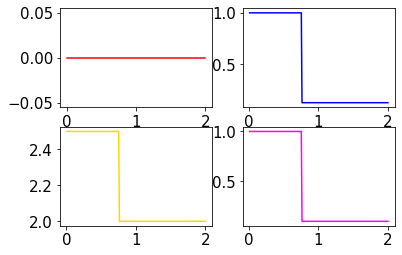

In [188]:
#Looking at the initial conditions (making sure they are what is expected)
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(Domain, U_0, color = "red")
axs[0, 1].plot(Domain[1:], Rho_Array, color = "blue")

axs[1, 0].plot(Domain[1:], Energy_Start, color = "gold")
axs[1, 1].plot(Domain[1:], P_Array, color = "magenta")

In [189]:
def function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array):
    #Running the loop
    while Time_Start < Time_Stop:
    
        #Going through the equations
        New_Vel = new_velocity(U_0, Delta_T_Start, P_Array[1:], P_Array[:-1], Q_Start[1:], Q_Start[:-1], Delta_Mass)
   
        New_Vel[0] = 0 
        New_Vel[-1] = 0
    
        New_Position = new_positions(Domain, Delta_T_Start , New_Vel)
        New_Density = new_density(Delta_Mass_P12, New_Position[1:], New_Position[:-1])
        New_Sound = new_sound(P_Array, Rho_Array)
        Average_Density = Rho(New_Density, Rho_Array)
        New_Viscosity = Viscosity(New_Vel[1:], New_Vel[:-1], New_Position[1:], New_Position[:-1], New_Sound, Average_Density)
        New_Energy = new_energy(Energy_Start, P_Array, Q_Start, New_Density, Rho_Array)
        New_Pressure = new_presure(New_Energy, New_Density)
    
        New_Time = time_update(Time_Start, Delta_T_Start)
    
        New_Delta_X = (New_Position[1:] - New_Position[:-1])
    
        New_Delta_Time = np.min(CFL * (New_Delta_X / (New_Sound + New_Vel[:-1])))
    
            #Setting new values to old values
        U_0, Delta_T_Start, P_Array, Rho_Array, Energy_Start, Time_Start = New_Vel, New_Delta_Time, New_Pressure, New_Density, New_Energy, New_Time
        Q_Start = New_Viscosity
        Domain = New_Position
        Delta_X = New_Delta_X
    
    return [New_Vel, New_Density, New_Pressure, New_Energy, Domain]

In [190]:
#Running the function
Values = function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array)

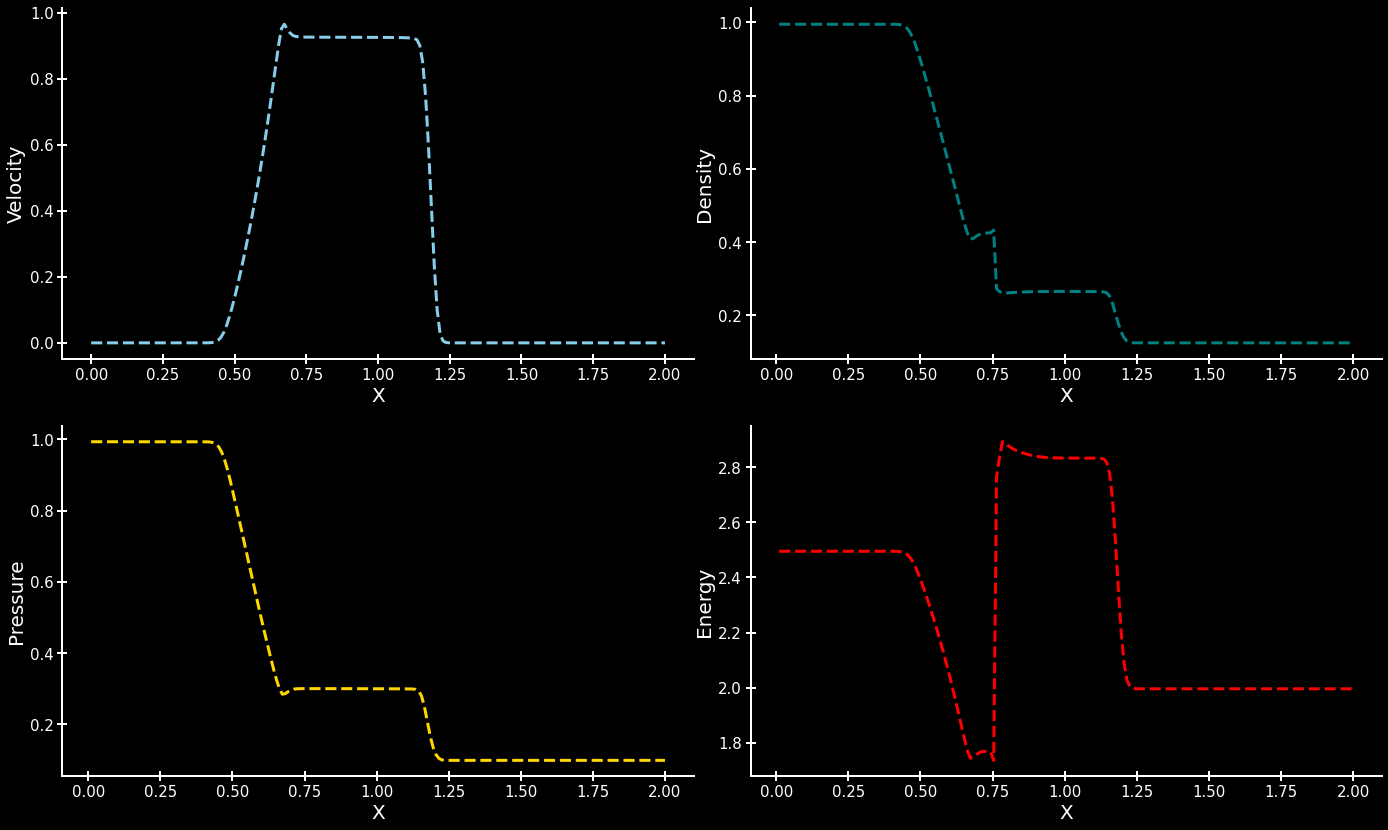

In [191]:
#Plotting
    #Velocity Plot
fig = plt.figure(figsize = (20,12), facecolor = "black")
ax = plt.subplot(2,2,1) 
fig.tight_layout(pad = 3.0)
plt.plot(Domain, Values[0], color = "skyblue", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Velocity' , size = '20', color = "white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')


    #Density Plot
ax1 = plt.subplot(2,2,2) 
plt.plot(Domain[1:], Values[1], color = "teal", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax1.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax1.set_facecolor("black")
ax1.spines["bottom"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
plt.setp(ax1.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Density' , size = '20', color = "white")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Pressure Plot
ax12 = plt.subplot(2,2,3) 
plt.plot(Domain[1:], Values[2], color = "gold", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax12.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax12.set_facecolor("black")
ax12.spines["bottom"].set_color("white")
ax12.spines["left"].set_color("white")
ax12.spines["top"].set_color("white")
ax12.spines["right"].set_color("white")
plt.setp(ax12.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Pressure' , size = '20', color = "white")
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Energy Plot
ax123 = plt.subplot(2,2,4) 
plt.plot(Domain[1:], Values[3], color = "red", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax123.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax123.set_facecolor("black")
ax123.spines["bottom"].set_color("white")
ax123.spines["left"].set_color("white")
ax123.spines["top"].set_color("white")
ax123.spines["right"].set_color("white")
plt.setp(ax123.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Energy' , size = '20', color = "white")
ax123.spines['right'].set_visible(False)
ax123.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.show()

It seems like our solution is pretty similar to what Stone and Norman found in their paper. The only diference that is standing out has to deal with ours being a bit "jumpier" (sharp) in areas where their's is flat. Other than that difference, however, they seem to have the same overall shape, they both round off at the edges, they both seem to reach the about same y values in the same positions, and they seem to approximate the analytical method decently. 

## Part B

- Simple numerical schemes are prone to certain artifacts near the shock interface. What deviations from the analytic solution do you notice? What numerical improvements would you apply to address them?

One of the main differences that I notice between the numerical and analytical solutions is that the numerical solution tends to round out where the analytical doesn't. Meaning that the edges of the analytical solution are missed out on by the numerical (it doesn't get as sharp at the corners). Another difference that I notice between the two is that the analitical solution has some fluxtuations around the horizontal regions where the numerical solution does not. I think that a big inprovement would be to add in more points (maybe with a smaller step size). 

## Part C

- Check the shock solution for N = 100,200 and 400 grid cells. How quickly is the solution converging? Is this consistent with your expectations?

See part B for the N = 200 plots. 


In [192]:
#Values and Arrays
Gamma = 1.4
N = 100
U_0 = np.full(shape = N, fill_value = 0) #Can't start off at zero 
CFL = 0.5
Q_0 = 4
Q_1 = 0.5
Time_Start = 0 
Time_Stop = 0.245
Q_Start = np.zeros(N-1)
Domain = np.linspace(0,2,N)

Delta_X = (Domain[1:] - Domain[:-1]) #Need to make this an array from xi to xi+1

    #Starting Arrays
P_Array = []
Rho_Array = []

#Setting up the left and right sides
for i in Domain[:-1]:
    if i <= 0.75:
        P_Array.append(1)
        Rho_Array.append(1)
        
    if i > 0.75:
        P_Array.append(0.1)
        Rho_Array.append(0.125)

#Mass to start
Delta_Mass_P12 = np.multiply(Rho_Array , np.divide((max(Domain) - min(Domain)), N))#(N-1)))
Delta_Mass = np.pad(0.5 * (Delta_Mass_P12[1:] + Delta_Mass_P12[:-1]), 1, 'edge') 

#Delts time to start
Delta_T_Start = 0.0001#np.min(np.multiply(CFL, np.divide(Delta_X , np.add(new_sound(P_Array, Rho_Array), U_0[:-1]))))

#Energy to start
Energy_Start = np.full(shape = len(P_Array), fill_value = np.divide(P_Array, np.multiply(Rho_Array, (Gamma - 1))))

#Viscosity to start
Q_Start = np.full(shape = len(P_Array), fill_value = 0)

print(np.size(Delta_Mass_P12), np.size(Delta_Mass), np.size(Energy_Start), np.size(Q_Start))

99 100 99 99


In [193]:
Values_1 = function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array)

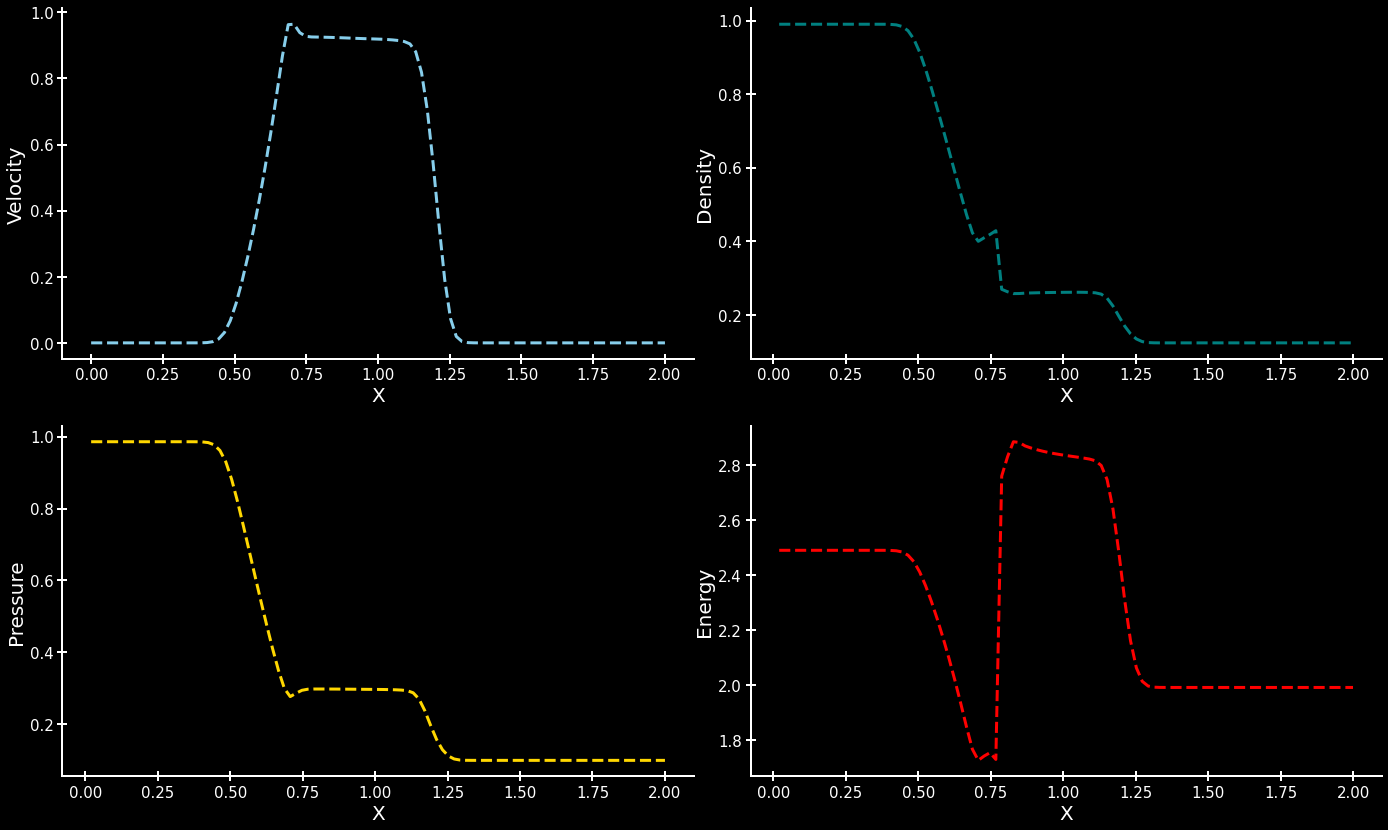

In [194]:
#Plotting
    #Velocity Plot
fig = plt.figure(figsize = (20,12), facecolor = "black")
ax = plt.subplot(2,2,1) 
fig.tight_layout(pad = 3.0)
plt.plot(Domain, Values_1[0], color = "skyblue", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  


ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Velocity' , size = '20', color = "white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')


    #Density Plot
ax1 = plt.subplot(2,2,2) 
plt.plot(Domain[1:], Values_1[1], color = "teal", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax1.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax1.set_facecolor("black")
ax1.spines["bottom"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
plt.setp(ax1.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Density' , size = '20', color = "white")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Pressure Plot
ax12 = plt.subplot(2,2,3) 
plt.plot(Domain[1:], Values_1[2], color = "gold", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax12.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax12.set_facecolor("black")
ax12.spines["bottom"].set_color("white")
ax12.spines["left"].set_color("white")
ax12.spines["top"].set_color("white")
ax12.spines["right"].set_color("white")
plt.setp(ax12.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Pressure' , size = '20', color = "white")
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Energy Plot
ax123 = plt.subplot(2,2,4) 
plt.plot(Domain[1:], Values_1[3], color = "red", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax123.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax123.set_facecolor("black")
ax123.spines["bottom"].set_color("white")
ax123.spines["left"].set_color("white")
ax123.spines["top"].set_color("white")
ax123.spines["right"].set_color("white")
plt.setp(ax123.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Energy' , size = '20', color = "white")
ax123.spines['right'].set_visible(False)
ax123.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.show()

In [195]:
#Values and Arrays
Gamma = 1.4
N = 400
U_0 = np.full(shape = N, fill_value = 0) #Can't start off at zero 
CFL = 0.5
Q_0 = 4
Q_1 = 0.5
Time_Start = 0 
Time_Stop = 0.245
Q_Start = np.zeros(N-1)
Domain = np.linspace(0,2,N)

Delta_X = (Domain[1:] - Domain[:-1]) #Need to make this an array from xi to xi+1

    #Starting Arrays
P_Array = []
Rho_Array = []

#Setting up the left and right sides
for i in Domain[:-1]:
    if i <= 0.75:
        P_Array.append(1)
        Rho_Array.append(1)
        
    if i > 0.75:
        P_Array.append(0.1)
        Rho_Array.append(0.125)

#Mass to start
Delta_Mass_P12 = np.multiply(Rho_Array , np.divide((max(Domain) - min(Domain)), N))#(N-1)))
Delta_Mass = np.pad(0.5 * (Delta_Mass_P12[1:] + Delta_Mass_P12[:-1]), 1, 'edge') 

#Delts time to start
Delta_T_Start = 0.0001#np.min(np.multiply(CFL, np.divide(Delta_X , np.add(new_sound(P_Array, Rho_Array), U_0[:-1]))))

#Energy to start
Energy_Start = np.full(shape = len(P_Array), fill_value = np.divide(P_Array, np.multiply(Rho_Array, (Gamma - 1))))

#Viscosity to start
Q_Start = np.full(shape = len(P_Array), fill_value = 0)

print(np.size(Delta_Mass_P12), np.size(Delta_Mass), np.size(Energy_Start), np.size(Q_Start))

399 400 399 399


In [196]:
Values_2 = function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array)

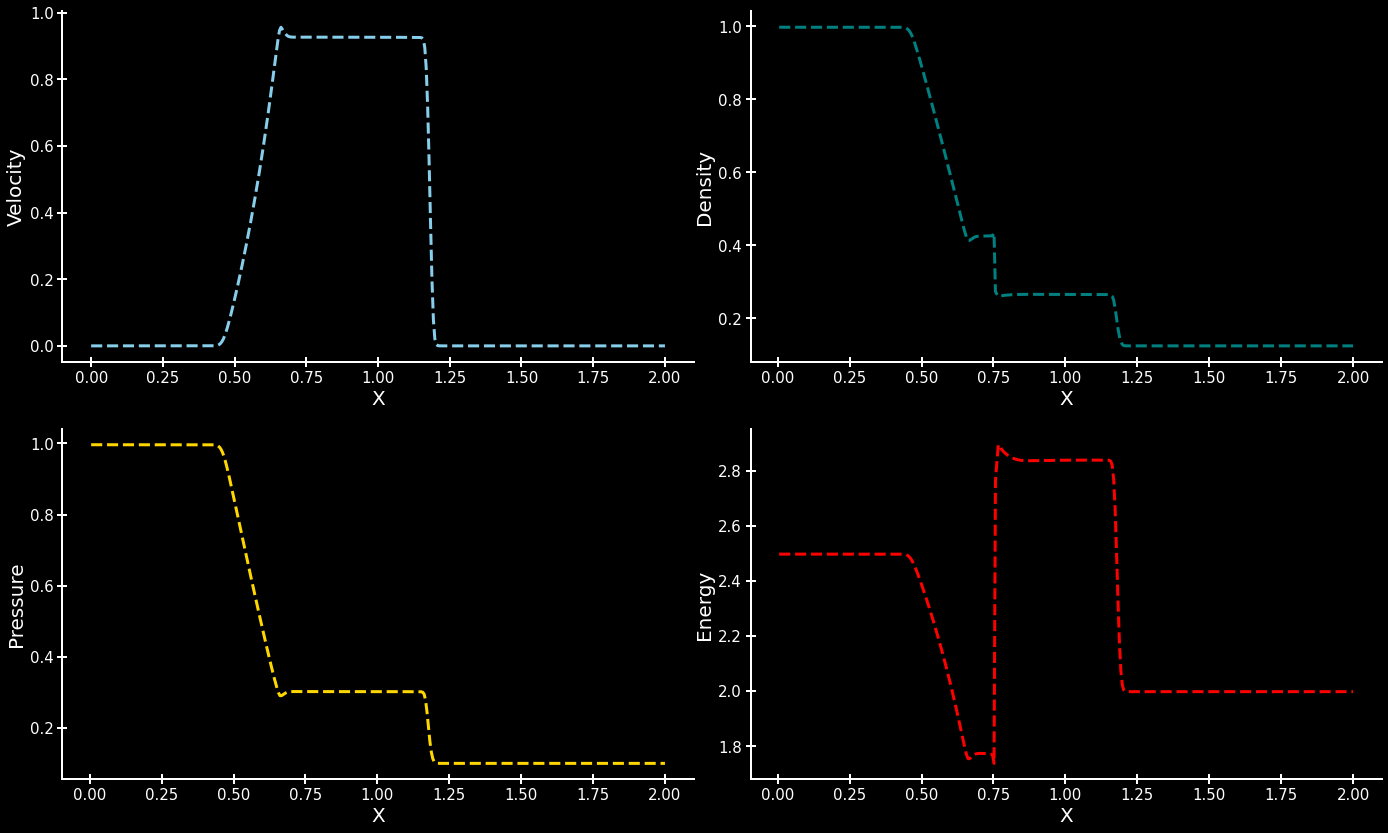

In [197]:
#Plotting
    #Velocity Plot
fig = plt.figure(figsize = (20,12), facecolor = "black")
ax = plt.subplot(2,2,1) 
fig.tight_layout(pad = 3.0)
plt.plot(Domain, Values_2[0], color = "skyblue", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  


ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Velocity' , size = '20', color = "white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')


    #Density Plot
ax1 = plt.subplot(2,2,2) 
plt.plot(Domain[1:], Values_2[1], color = "teal", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax1.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax1.set_facecolor("black")
ax1.spines["bottom"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
plt.setp(ax1.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Density' , size = '20', color = "white")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Pressure Plot
ax12 = plt.subplot(2,2,3) 
plt.plot(Domain[1:], Values_2[2], color = "gold", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax12.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax12.set_facecolor("black")
ax12.spines["bottom"].set_color("white")
ax12.spines["left"].set_color("white")
ax12.spines["top"].set_color("white")
ax12.spines["right"].set_color("white")
plt.setp(ax12.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Pressure' , size = '20', color = "white")
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Energy Plot
ax123 = plt.subplot(2,2,4) 
plt.plot(Domain[1:], Values_2[3], color = "red", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax123.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax123.set_facecolor("black")
ax123.spines["bottom"].set_color("white")
ax123.spines["left"].set_color("white")
ax123.spines["top"].set_color("white")
ax123.spines["right"].set_color("white")
plt.setp(ax123.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Energy' , size = '20', color = "white")
ax123.spines['right'].set_visible(False)
ax123.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.show()

From the plots it looks like incresing N causes the corners of the numerical method to become sharper (closer to the analytical). Jumping from 200 to 400 seems to have made a good step in improvment, so I'm guessing that it wouldn't take too long for the numerical and analitical to converge. This follows along with what I thought might help in Part B. 

## Part D

- Decrease the CFL number to 0.25 and increase it to 1.1. What happens to the shock solution in each case?

In [198]:
#Values and Arrays
Gamma = 1.4
N = 400
U_0 = np.full(shape = N, fill_value = 0) #Can't start off at zero 
CFL = 0.25
Q_0 = 4
Q_1 = 0.5
Time_Start = 0 
Time_Stop = 0.245
Q_Start = np.zeros(N-1)
Domain = np.linspace(0,2,N)

Delta_X = (Domain[1:] - Domain[:-1]) #Need to make this an array from xi to xi+1

    #Starting Arrays
P_Array = []
Rho_Array = []

#Setting up the left and right sides
for i in Domain[:-1]:
    if i <= 0.75:
        P_Array.append(1)
        Rho_Array.append(1)
        
    if i > 0.75:
        P_Array.append(0.1)
        Rho_Array.append(0.125)

#Mass to start
Delta_Mass_P12 = np.multiply(Rho_Array , np.divide((max(Domain) - min(Domain)), N))#(N-1)))
Delta_Mass = np.pad(0.5 * (Delta_Mass_P12[1:] + Delta_Mass_P12[:-1]), 1, 'edge') 

#Delts time to start
Delta_T_Start = 0.0001#np.min(np.multiply(CFL, np.divide(Delta_X , np.add(new_sound(P_Array, Rho_Array), U_0[:-1]))))

#Energy to start
Energy_Start = np.full(shape = len(P_Array), fill_value = np.divide(P_Array, np.multiply(Rho_Array, (Gamma - 1))))

#Viscosity to start
Q_Start = np.full(shape = len(P_Array), fill_value = 0)

print(np.size(Delta_Mass_P12), np.size(Delta_Mass), np.size(Energy_Start), np.size(Q_Start))

399 400 399 399


In [199]:
Values_2 = function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array)

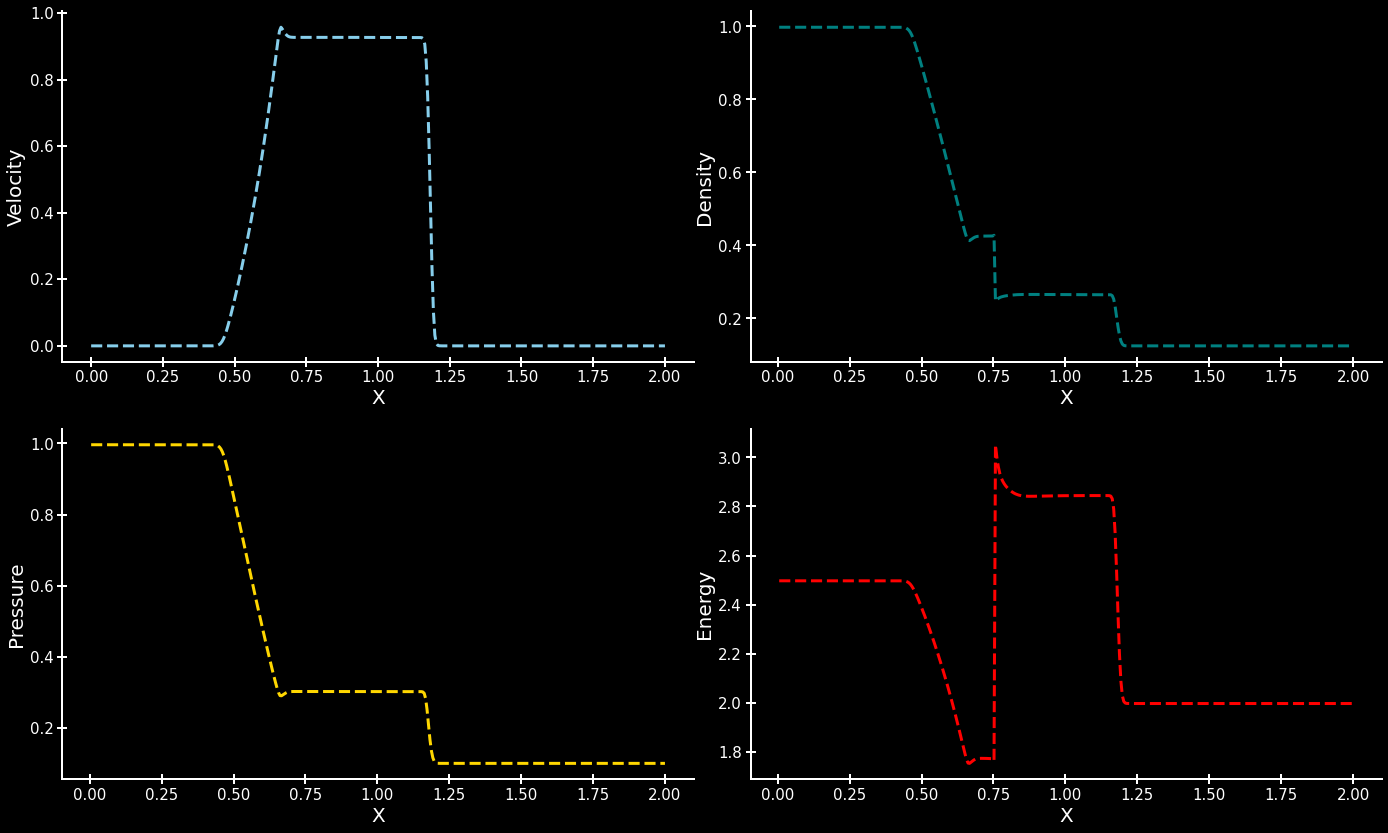

In [200]:
#Plotting
    #Velocity Plot
fig = plt.figure(figsize = (20,12), facecolor = "black")
ax = plt.subplot(2,2,1) 
fig.tight_layout(pad = 3.0)
plt.plot(Domain, Values_2[0], color = "skyblue", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  


ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Velocity' , size = '20', color = "white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')


    #Density Plot
ax1 = plt.subplot(2,2,2) 
plt.plot(Domain[1:], Values_2[1], color = "teal", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax1.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax1.set_facecolor("black")
ax1.spines["bottom"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
plt.setp(ax1.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Density' , size = '20', color = "white")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Pressure Plot
ax12 = plt.subplot(2,2,3) 
plt.plot(Domain[1:], Values_2[2], color = "gold", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax12.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax12.set_facecolor("black")
ax12.spines["bottom"].set_color("white")
ax12.spines["left"].set_color("white")
ax12.spines["top"].set_color("white")
ax12.spines["right"].set_color("white")
plt.setp(ax12.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Pressure' , size = '20', color = "white")
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Energy Plot
ax123 = plt.subplot(2,2,4) 
plt.plot(Domain[1:], Values_2[3], color = "red", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax123.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax123.set_facecolor("black")
ax123.spines["bottom"].set_color("white")
ax123.spines["left"].set_color("white")
ax123.spines["top"].set_color("white")
ax123.spines["right"].set_color("white")
plt.setp(ax123.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Energy' , size = '20', color = "white")
ax123.spines['right'].set_visible(False)
ax123.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.show()

In [201]:
#Values and Arrays
Gamma = 1.4
N = 400
U_0 = np.full(shape = N, fill_value = 0) #Can't start off at zero 
CFL = 1.1
Q_0 = 4
Q_1 = 0.5
Time_Start = 0 
Time_Stop = 0.245
Q_Start = np.zeros(N-1)
Domain = np.linspace(0,2,N)

Delta_X = (Domain[1:] - Domain[:-1]) #Need to make this an array from xi to xi+1

    #Starting Arrays
P_Array = []
Rho_Array = []

#Setting up the left and right sides
for i in Domain[:-1]:
    if i <= 0.75:
        P_Array.append(1)
        Rho_Array.append(1)
        
    if i > 0.75:
        P_Array.append(0.1)
        Rho_Array.append(0.125)

#Mass to start
Delta_Mass_P12 = np.multiply(Rho_Array , np.divide((max(Domain) - min(Domain)), N))#(N-1)))
Delta_Mass = np.pad(0.5 * (Delta_Mass_P12[1:] + Delta_Mass_P12[:-1]), 1, 'edge') 

#Delts time to start
Delta_T_Start = 0.0001#np.min(np.multiply(CFL, np.divide(Delta_X , np.add(new_sound(P_Array, Rho_Array), U_0[:-1]))))

#Energy to start
Energy_Start = np.full(shape = len(P_Array), fill_value = np.divide(P_Array, np.multiply(Rho_Array, (Gamma - 1))))

#Viscosity to start
Q_Start = np.full(shape = len(P_Array), fill_value = 0)

print(np.size(Delta_Mass_P12), np.size(Delta_Mass), np.size(Energy_Start), np.size(Q_Start))

399 400 399 399


In [202]:
Values_2 = function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array)

C:\Users\Mel\AppData\Local\Temp/ipykernel_7104/811395790.py:29: RuntimeWarning: invalid value encountered in sqrt
  c_s = (np.divide(np.multiply(Gamma , p) , rho)) ** (1/2)


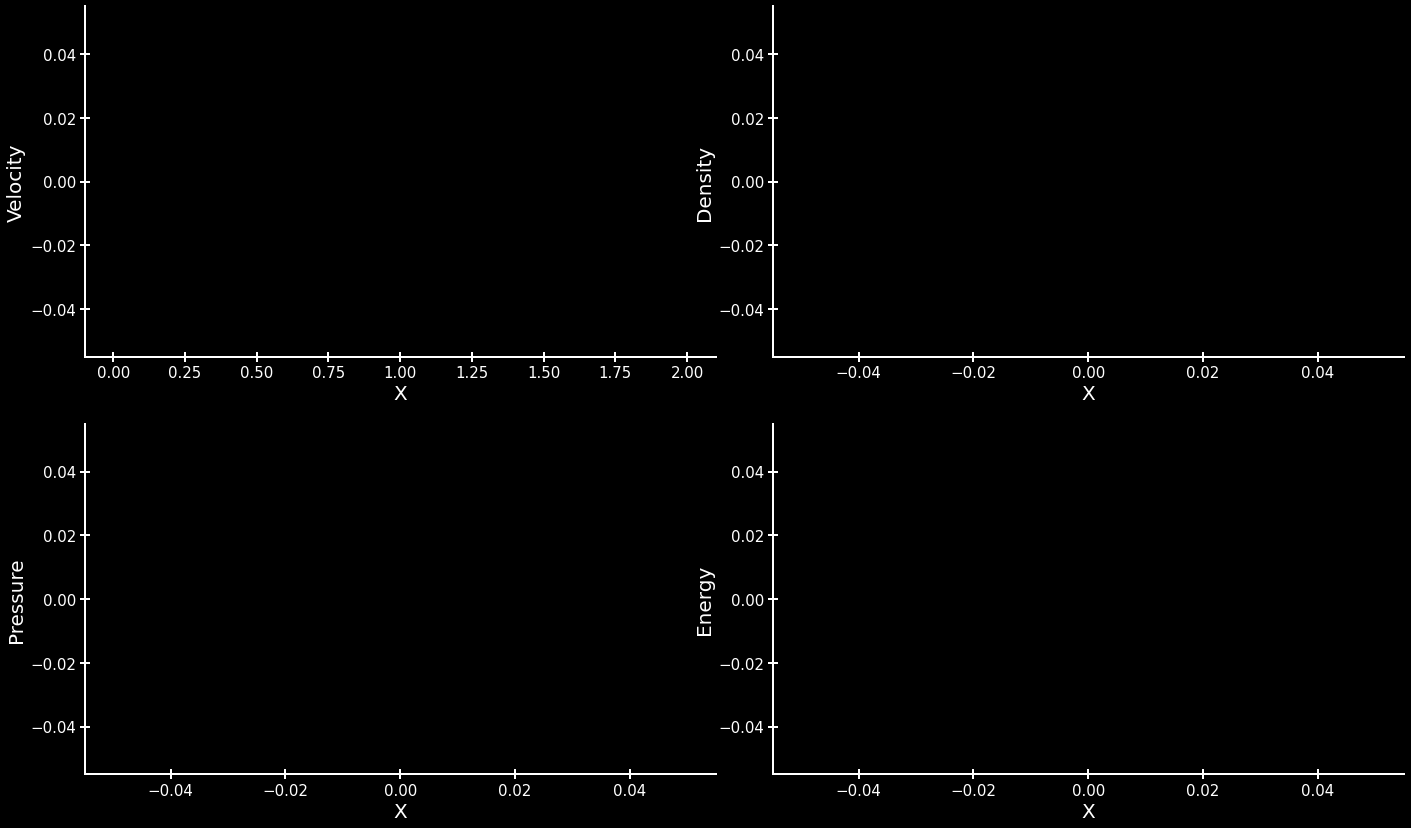

In [203]:
#Plotting
    #Velocity Plot
fig = plt.figure(figsize = (20,12), facecolor = "black")
ax = plt.subplot(2,2,1) 
fig.tight_layout(pad = 3.0)
plt.plot(Domain, Values_2[0], color = "skyblue", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  


ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Velocity' , size = '20', color = "white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')


    #Density Plot
ax1 = plt.subplot(2,2,2) 
plt.plot(Domain[1:], Values_2[1], color = "teal", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax1.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax1.set_facecolor("black")
ax1.spines["bottom"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
plt.setp(ax1.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Density' , size = '20', color = "white")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Pressure Plot
ax12 = plt.subplot(2,2,3) 
plt.plot(Domain[1:], Values_2[2], color = "gold", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax12.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax12.set_facecolor("black")
ax12.spines["bottom"].set_color("white")
ax12.spines["left"].set_color("white")
ax12.spines["top"].set_color("white")
ax12.spines["right"].set_color("white")
plt.setp(ax12.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Pressure' , size = '20', color = "white")
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Energy Plot
ax123 = plt.subplot(2,2,4) 
plt.plot(Domain[1:], Values_2[3], color = "red", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax123.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax123.set_facecolor("black")
ax123.spines["bottom"].set_color("white")
ax123.spines["left"].set_color("white")
ax123.spines["top"].set_color("white")
ax123.spines["right"].set_color("white")
plt.setp(ax123.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Energy' , size = '20', color = "white")
ax123.spines['right'].set_visible(False)
ax123.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.show()

The first thing that I noticed is that a CFL of 1.1 causes the numerical solution to break. The second thing I noticed is that a lower CFL of 0.25 causes a spike in the solution (Specifically in the energy). 

## Part E

- Evaluate how sensitive the solution is to magnitude of the coefficient of artificial viscosity. Increase the viscosity coefficients by a factor of 2 and decrease them by a factor of 2. How does the solution change? What impact do the two different viscous components have on the solution?

In [204]:
#Values and Arrays
Gamma = 1.4
N = 400
U_0 = np.full(shape = N, fill_value = 0) #Can't start off at zero 
CFL = 0.5
Q_0 = 4 * 2
Q_1 = 0.5 * 2
Time_Start = 0 
Time_Stop = 0.245
Q_Start = np.zeros(N-1)
Domain = np.linspace(0,2,N)

Delta_X = (Domain[1:] - Domain[:-1]) #Need to make this an array from xi to xi+1

    #Starting Arrays
P_Array = []
Rho_Array = []

#Setting up the left and right sides
for i in Domain[:-1]:
    if i <= 0.75:
        P_Array.append(1)
        Rho_Array.append(1)
        
    if i > 0.75:
        P_Array.append(0.1)
        Rho_Array.append(0.125)

#Mass to start
Delta_Mass_P12 = np.multiply(Rho_Array , np.divide((max(Domain) - min(Domain)), N))#(N-1)))
Delta_Mass = np.pad(0.5 * (Delta_Mass_P12[1:] + Delta_Mass_P12[:-1]), 1, 'edge') 

#Delts time to start
Delta_T_Start = 0.0001#np.min(np.multiply(CFL, np.divide(Delta_X , np.add(new_sound(P_Array, Rho_Array), U_0[:-1]))))

#Energy to start
Energy_Start = np.full(shape = len(P_Array), fill_value = np.divide(P_Array, np.multiply(Rho_Array, (Gamma - 1))))

#Viscosity to start
Q_Start = np.full(shape = len(P_Array), fill_value = 0)

print(np.size(Delta_Mass_P12), np.size(Delta_Mass), np.size(Energy_Start), np.size(Q_Start))

399 400 399 399


In [205]:
Values_2 = function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array)

C:\Users\Mel\AppData\Local\Temp/ipykernel_7104/811395790.py:29: RuntimeWarning: invalid value encountered in sqrt
  c_s = (np.divide(np.multiply(Gamma , p) , rho)) ** (1/2)


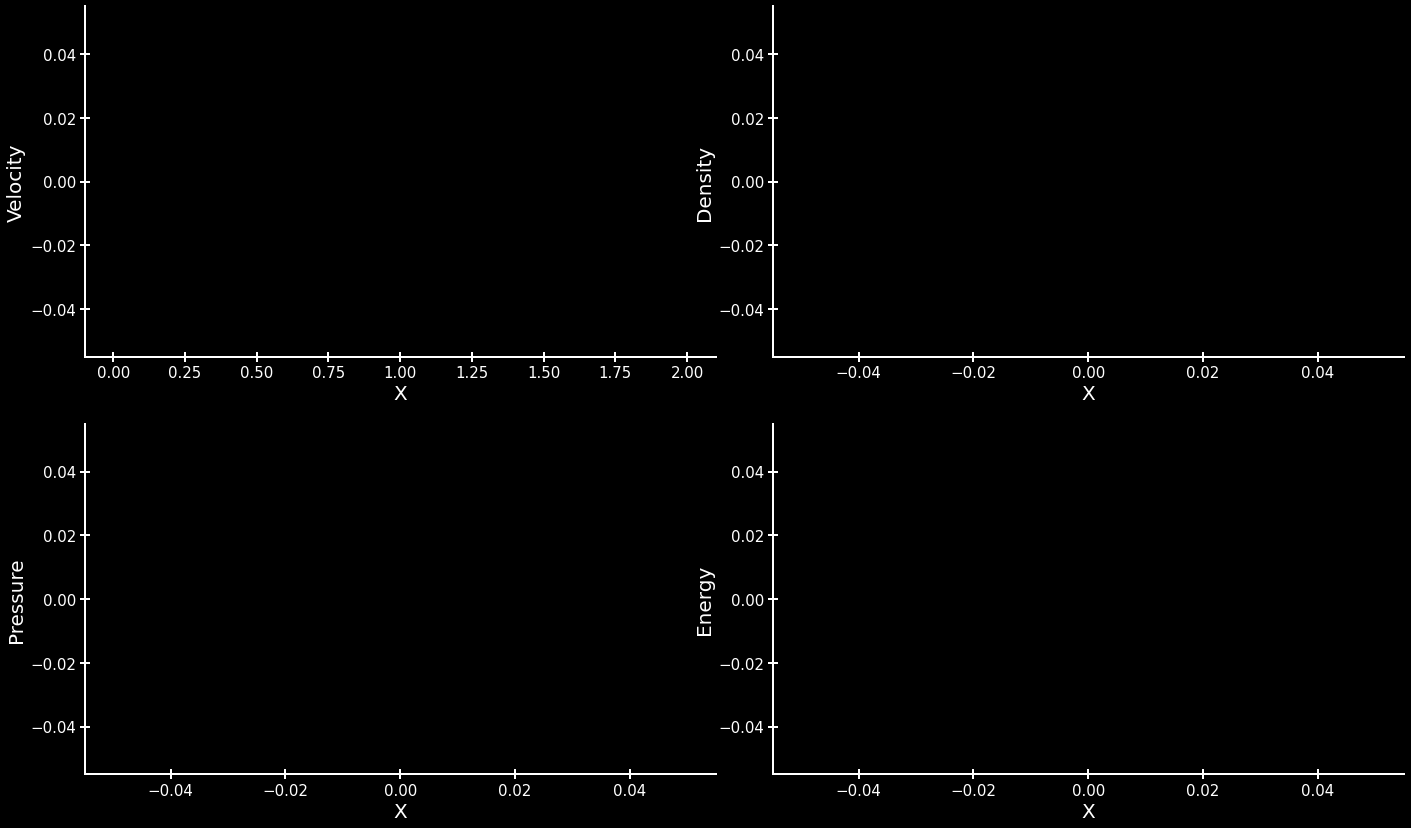

In [206]:
#Plotting
    #Velocity Plot
fig = plt.figure(figsize = (20,12), facecolor = "black")
ax = plt.subplot(2,2,1) 
fig.tight_layout(pad = 3.0)
plt.plot(Domain, Values_2[0], color = "skyblue", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  


ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Velocity' , size = '20', color = "white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')


    #Density Plot
ax1 = plt.subplot(2,2,2) 
plt.plot(Domain[1:], Values_2[1], color = "teal", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax1.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax1.set_facecolor("black")
ax1.spines["bottom"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
plt.setp(ax1.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Density' , size = '20', color = "white")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Pressure Plot
ax12 = plt.subplot(2,2,3) 
plt.plot(Domain[1:], Values_2[2], color = "gold", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax12.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax12.set_facecolor("black")
ax12.spines["bottom"].set_color("white")
ax12.spines["left"].set_color("white")
ax12.spines["top"].set_color("white")
ax12.spines["right"].set_color("white")
plt.setp(ax12.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Pressure' , size = '20', color = "white")
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Energy Plot
ax123 = plt.subplot(2,2,4) 
plt.plot(Domain[1:], Values_2[3], color = "red", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax123.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax123.set_facecolor("black")
ax123.spines["bottom"].set_color("white")
ax123.spines["left"].set_color("white")
ax123.spines["top"].set_color("white")
ax123.spines["right"].set_color("white")
plt.setp(ax123.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Energy' , size = '20', color = "white")
ax123.spines['right'].set_visible(False)
ax123.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.show()

In [207]:
#Values and Arrays
Gamma = 1.4
N = 400
U_0 = np.full(shape = N, fill_value = 0) #Can't start off at zero 
CFL = 0.5
Q_0 = 4 / 2
Q_1 = 0.5 / 2
Time_Start = 0 
Time_Stop = 0.245
Q_Start = np.zeros(N-1)
Domain = np.linspace(0,2,N)

Delta_X = (Domain[1:] - Domain[:-1]) #Need to make this an array from xi to xi+1

    #Starting Arrays
P_Array = []
Rho_Array = []

#Setting up the left and right sides
for i in Domain[:-1]:
    if i <= 0.75:
        P_Array.append(1)
        Rho_Array.append(1)
        
    if i > 0.75:
        P_Array.append(0.1)
        Rho_Array.append(0.125)

#Mass to start
Delta_Mass_P12 = np.multiply(Rho_Array , np.divide((max(Domain) - min(Domain)), N))#(N-1)))
Delta_Mass = np.pad(0.5 * (Delta_Mass_P12[1:] + Delta_Mass_P12[:-1]), 1, 'edge') 

#Delts time to start
Delta_T_Start = 0.0001#np.min(np.multiply(CFL, np.divide(Delta_X , np.add(new_sound(P_Array, Rho_Array), U_0[:-1]))))

#Energy to start
Energy_Start = np.full(shape = len(P_Array), fill_value = np.divide(P_Array, np.multiply(Rho_Array, (Gamma - 1))))

#Viscosity to start
Q_Start = np.full(shape = len(P_Array), fill_value = 0)

print(np.size(Delta_Mass_P12), np.size(Delta_Mass), np.size(Energy_Start), np.size(Q_Start))

399 400 399 399


In [208]:
Values_2 = function(U_0, Delta_T_Start, P_Array, Q_Start, Delta_Mass, Domain, Delta_Mass_P12, Energy_Start, Time_Start, Rho_Array)

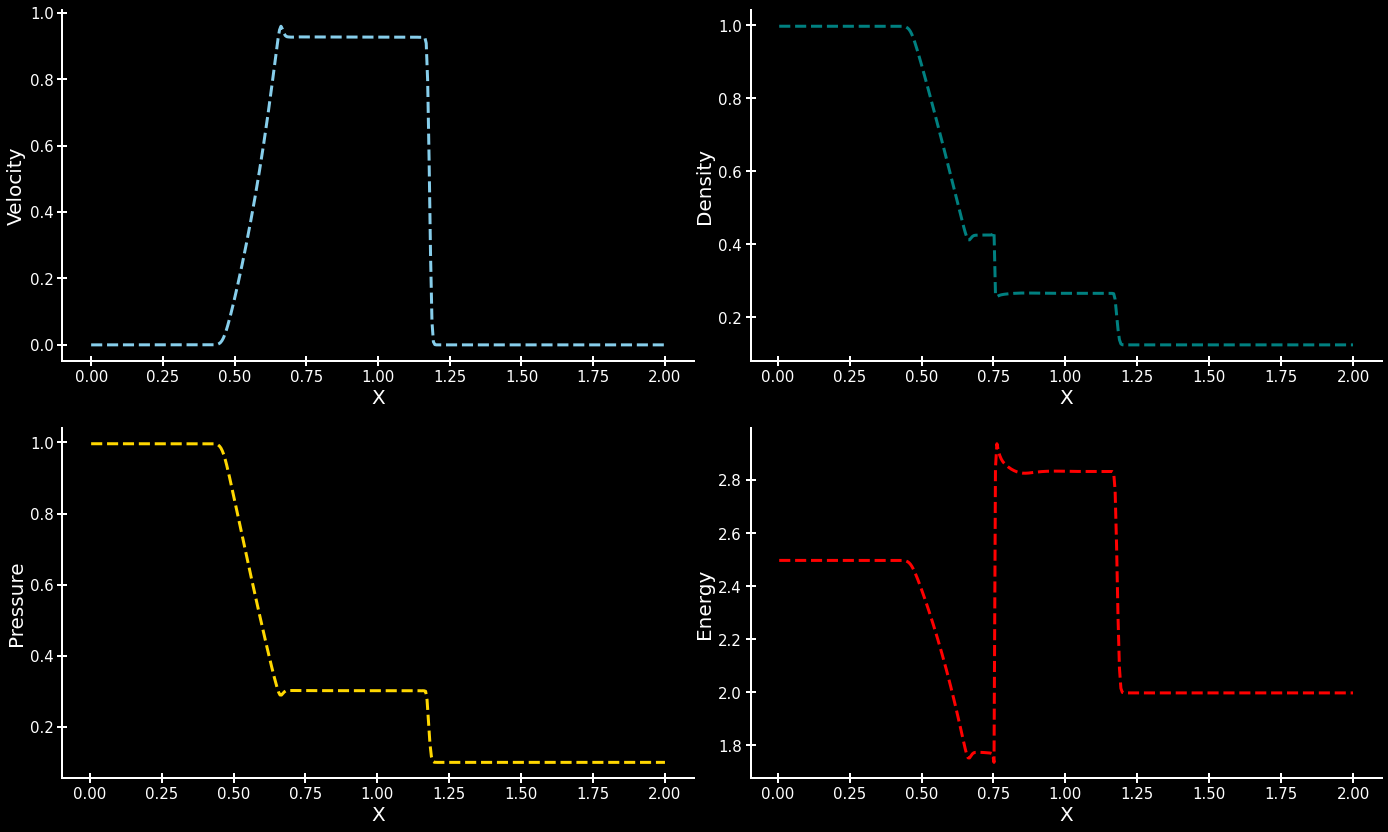

In [209]:
#Plotting
    #Velocity Plot
fig = plt.figure(figsize = (20,12), facecolor = "black")
ax = plt.subplot(2,2,1) 
fig.tight_layout(pad = 3.0)
plt.plot(Domain, Values_2[0], color = "skyblue", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  


ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Velocity' , size = '20', color = "white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')


    #Density Plot
ax1 = plt.subplot(2,2,2) 
plt.plot(Domain[1:], Values_2[1], color = "teal", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax1.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax1.set_facecolor("black")
ax1.spines["bottom"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
plt.setp(ax1.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Density' , size = '20', color = "white")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Pressure Plot
ax12 = plt.subplot(2,2,3) 
plt.plot(Domain[1:], Values_2[2], color = "gold", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax12.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax12.set_facecolor("black")
ax12.spines["bottom"].set_color("white")
ax12.spines["left"].set_color("white")
ax12.spines["top"].set_color("white")
ax12.spines["right"].set_color("white")
plt.setp(ax12.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Pressure' , size = '20', color = "white")
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

    #Energy Plot
ax123 = plt.subplot(2,2,4) 
plt.plot(Domain[1:], Values_2[3], color = "red", linewidth = 3, linestyle = '--', label = "Triangle", zorder = 1)  

ax123.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax123.set_facecolor("black")
ax123.spines["bottom"].set_color("white")
ax123.spines["left"].set_color("white")
ax123.spines["top"].set_color("white")
ax123.spines["right"].set_color("white")
plt.setp(ax123.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Energy' , size = '20', color = "white")
ax123.spines['right'].set_visible(False)
ax123.spines['top'].set_visible(False)
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.show()

Doubling the coefficients for the artificial viscosities ended up breaking the numerical evaluation. However, decreasing the coefficients didn't seem to do a whole lot. It just seems like there is a bit of a spike in the energy (similar to what we say with a decrease in the CFL value).